In [59]:
import os
import sys

os.environ["XFORMERS_DISABLED"] = "1" # Switch to enable xFormers

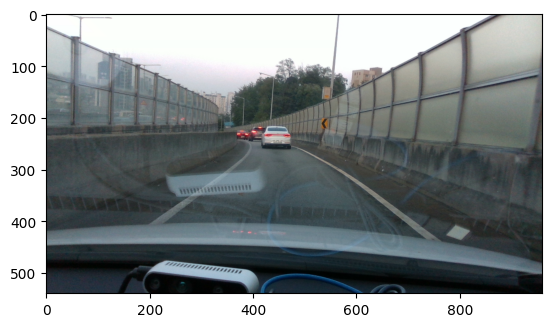

In [60]:
import urllib

import io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from transformers import AutoImageProcessor, AutoModel


img = Image.open('/home/imlab/drivable_area_research/data/realcar/1716287138.79115.png')
img_np = np.array(img) ## 행렬로 변환된 이미지

plt.imshow(img_np) ## 행렬 이미지를 다시 이미지로 변경해 디스플레이
plt.show() ## 이미지 인터프린터에 출력

processor = AutoImageProcessor.from_pretrained('facebook/dinov2-giant')
model = AutoModel.from_pretrained('facebook/dinov2-giant')

inputs = processor(images=img_np, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

In [62]:
inputs.pixel_values[0].shape

torch.Size([3, 224, 224])

In [63]:
last_hidden_states.shape

torch.Size([1, 257, 1536])

In [71]:
from numpy.linalg import norm

idx = 170
mean = last_hidden_states[0][idx].detach().numpy()

cosine_sim = np.dot(last_hidden_states[0].detach().numpy(), mean) / (norm(last_hidden_states[0].detach().numpy())*norm(mean))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


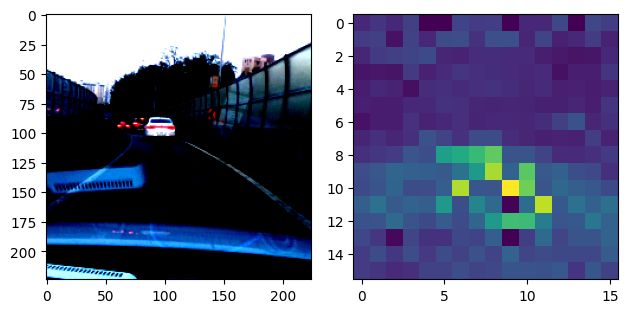

In [78]:
norm_cosine = cosine_sim/np.max(cosine_sim)

plt.subplot(1,2,1)
plt.imshow(inputs.pixel_values[0].permute(1,2,0))
plt.subplot(1,2,2)
plt.imshow(norm_cosine[1:].reshape((16, 16)))
# plt.colorbar()
plt.tight_layout()
plt.show()